In [1]:
import numpy as np
import pandas as pd

from src.constant import DATA_DIR, MAIN_DIR
from src.database import DB
from src.database.queries import *
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_from_index_file
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver

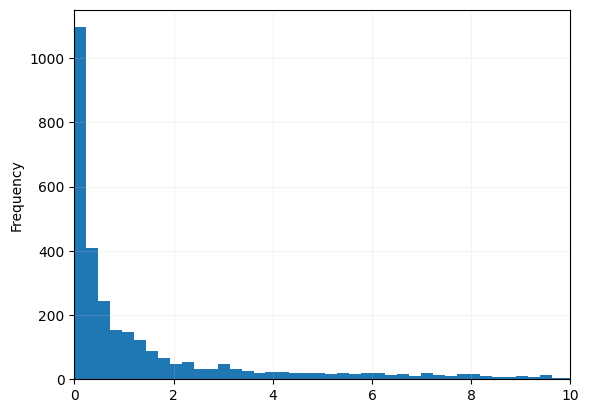

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.2
plt.rcParams["grid.color"] = "#cccccc"
plt.rcParams["axes.xmargin"] = 0

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"run-plain-30-*.db"))[0]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].plot.hist(bins=50)
plt.xlim(0, 10)
plt.title
plt.show()

In [42]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].describe()

count    2996.000000
mean        1.434296
std         2.125055
min         0.000000
25%         0.130000
50%         0.470000
75%         1.637478
max        12.038960
Name: time, dtype: float64

<Axes: ylabel='Frequency'>

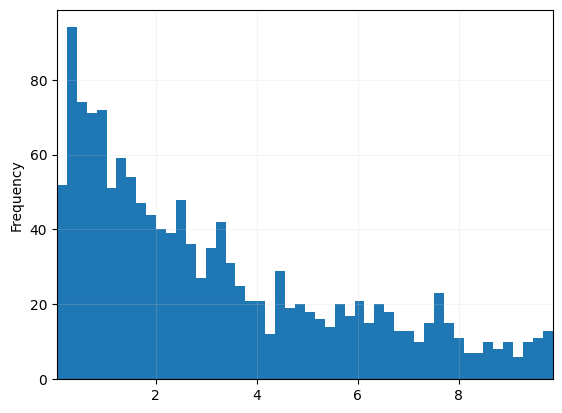

In [43]:
db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"run-plain-30-*.db"))[0]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].plot.hist(bins=50)

In [44]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].describe()

count    1404.000000
mean        3.163501
std         2.600401
min         0.040000
25%         1.000000
50%         2.435000
75%         4.850000
max         9.870000
Name: time, dtype: float64

In [64]:
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "time",
        ].sum() / 3600
    return np.round(pd.Series(times).mean(), 2)

n = 30
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f} h")
print(f"sur25: {sur25:.2f} h")
print(f"sur50: {sur50:.2f} h")
print(f"sur75: {sur75:.2f} h")

plain: 9.39 h
sur25: 8.10 h
sur50: 7.12 h
sur75: 5.98 h


In [46]:
# skip cutt-offs
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0)
            & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
            "time",
        ].mean()
    return np.round(pd.Series(times).mean(), 2)

n = 30
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f}")
print(f"sur25: {sur25:.2f}")
print(f"sur50: {sur50:.2f}")
print(f"sur75: {sur75:.2f}")

plain: 1.22
sur25: 1.25
sur50: 1.28
sur75: 1.29


In [29]:
# % cutt-offs
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "cost"
        ].eq(TSP_LKH_Solver.MAX_COST).mean()
    return np.round(pd.Series(times).mean(), 2)

n = 30
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f}")
print(f"sur25: {sur25:.2f}")
print(f"sur50: {sur50:.2f}")
print(f"sur75: {sur75:.2f}")

plain: 0.30
sur25: 0.31
sur50: 0.32
sur75: 0.32
